# Movie reviews - Canvas Discussion 1
### Heew Kim | 12 Oct 2020

Modifications based on Movie Reviews task (MR) starter codes 'moviereviews_first_full_iteration.ipynb'. 

In [177]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [178]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

## Original feature building and extraction functions 

In [179]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

## Original training and test sets from function

In [180]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do):
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_train.tsv', my_random_seed=99)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


## Fit (and tune) Various Models

### MODEL: ordinary least squares

In [181]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

#Train set
ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print('OLS train model performance:')
print(ols_performance_train.performance_measures)

print('* * * * *')

#Test set
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print('OLS test model performance:')
print(ols_performance_test.performance_measures)

OLS train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 5161, 'TN': 4793, 'FP': 5219, 'FN': 4827, 'Accuracy': 0.4977, 'Precision': 0.4972061657032755, 'Recall': 0.5167200640768923, 'desc': 'ols_train'}
* * * * *
OLS test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1337, 'TN': 1120, 'FP': 1368, 'FN': 1175, 'Accuracy': 0.4914, 'Precision': 0.4942698706099815, 'Recall': 0.5322452229299363, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [182]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print('SVM train model performance:')
print(svm_performance_train.performance_measures)

print('* * * * *')

svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print('SVM test model performance:')
print(svm_performance_test.performance_measures)

SVM train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}
* * * * *
SVM test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2118, 'TN': 2048, 'FP': 440, 'FN': 394, 'Accuracy': 0.8332, 'Precision': 0.8279906176700548, 'Recall': 0.8431528662420382, 'desc': 'svm_test'}


### MODEL: logistic regression

In [183]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print('Log Reg train model performance:')
print(lgs_performance_train.performance_measures)

print('* * * * *')

lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print('Log Reg test model performance:')
print(lgs_performance_test.performance_measures)

Log Reg train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}
* * * * *
Log Reg test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2127, 'TN': 2022, 'FP': 466, 'FN': 385, 'Accuracy': 0.8298, 'Precision': 0.8202853837254146, 'Recall': 0.8467356687898089, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [184]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print('Naive Bayes train model performance:')
print(nbs_performance_train.performance_measures)

print('* * * * *')

nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print('Naive Bayes test model performance:')
print(nbs_performance_test.performance_measures)

Naive Bayes train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9581, 'TN': 9851, 'FP': 161, 'FN': 407, 'Accuracy': 0.9716, 'Precision': 0.9834736193800041, 'Recall': 0.9592511013215859, 'desc': 'nbs_train'}
* * * * *
Naive Bayes test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1854, 'TN': 1828, 'FP': 660, 'FN': 658, 'Accuracy': 0.7364, 'Precision': 0.7374701670644391, 'Recall': 0.7380573248407644, 'desc': 'nbs_test'}


### ROC plot to compare performance of various models and fits

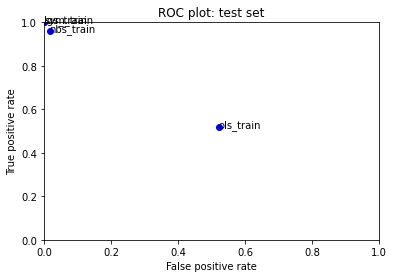

In [185]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### ROC plot to compare performance of various models and fits

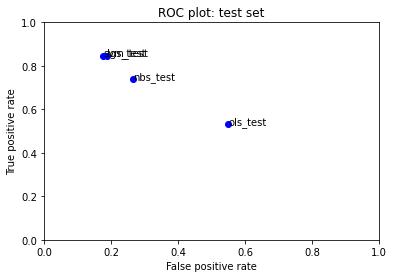

In [186]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## MODIFIED feature building and extraction functions 

In [187]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data_modified(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix; added uni- & bigrams; deleted stopwords
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 16, ngram_range = (1,2), alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

## MODIFIED training and test sets from function

In [188]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do):
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data_modified(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_train.tsv', my_random_seed=99)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 65536)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5

## Fit (and tune) Various Models

### MODEL: ordinary least squares

In [189]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

#Train set
ols_performance_train_m = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train_m')
ols_performance_train_m.compute_measures()
print('OLS train model performance:')
print(ols_performance_train_m.performance_measures)

print('* * * * *')

#Test set
ols_performance_test_m = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test_m')
ols_performance_test_m.compute_measures()
print('OLS test model performance:')
print(ols_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(ols_performance_train_m.performance_measures['Accuracy'] - ols_performance_train.performance_measures['Accuracy'])
print(ols_performance_test_m.performance_measures['Accuracy'] - ols_performance_test.performance_measures['Accuracy'])

OLS train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 5108, 'TN': 4885, 'FP': 5127, 'FN': 4880, 'Accuracy': 0.49965, 'Precision': 0.49907181240840254, 'Recall': 0.5114136964357229, 'desc': 'ols_train_m'}
* * * * *
OLS test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1317, 'TN': 1150, 'FP': 1338, 'FN': 1195, 'Accuracy': 0.4934, 'Precision': 0.496045197740113, 'Recall': 0.5242834394904459, 'desc': 'ols_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
0.0019500000000000073
0.0020000000000000018


### MODEL: SVM, linear

In [190]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train_m = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train_m')
svm_performance_train_m.compute_measures()
print('SVM train model performance:')
print(svm_performance_train_m.performance_measures)

print('* * * * *')

svm_performance_test_m = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test_m')
svm_performance_test_m.compute_measures()
print('SVM test model performance:')
print(svm_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(svm_performance_train_m.performance_measures['Accuracy'] - svm_performance_train.performance_measures['Accuracy'])
print(svm_performance_test_m.performance_measures['Accuracy'] - svm_performance_test.performance_measures['Accuracy'])

SVM train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train_m'}
* * * * *
SVM test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2086, 'TN': 2066, 'FP': 422, 'FN': 426, 'Accuracy': 0.8304, 'Precision': 0.8317384370015949, 'Recall': 0.8304140127388535, 'desc': 'svm_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
0.0
-0.0028000000000000247


### MODEL: logistic regression

In [191]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train_m = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train_m')
lgs_performance_train_m.compute_measures()
print('Log Reg train model performance:')
print(lgs_performance_train_m.performance_measures)

print('* * * * *')

lgs_performance_test_m = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test_m')
lgs_performance_test_m.compute_measures()
print('Log Reg test model performance:')
print(lgs_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(lgs_performance_train_m.performance_measures['Accuracy'] - lgs_performance_train.performance_measures['Accuracy'])
print(lgs_performance_test_m.performance_measures['Accuracy'] - lgs_performance_test.performance_measures['Accuracy'])

Log Reg train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train_m'}
* * * * *
Log Reg test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2105, 'TN': 2068, 'FP': 420, 'FN': 407, 'Accuracy': 0.8346, 'Precision': 0.8336633663366336, 'Recall': 0.8379777070063694, 'desc': 'lgs_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
0.0
0.0048000000000000265


### MODEL: Naive Bayes

In [192]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train_m = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train_m')
nbs_performance_train_m.compute_measures()
print('Naive Bayes train model performance:')
print(nbs_performance_train_m.performance_measures)

print('* * * * *')

nbs_performance_test_m = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test_m')
nbs_performance_test_m.compute_measures()
print('Naive Bayes test model performance:')
print(nbs_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(nbs_performance_train_m.performance_measures['Accuracy'] - nbs_performance_train.performance_measures['Accuracy'])
print(nbs_performance_test_m.performance_measures['Accuracy'] - nbs_performance_test.performance_measures['Accuracy'])

Naive Bayes train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9659, 'TN': 9685, 'FP': 327, 'FN': 329, 'Accuracy': 0.9672, 'Precision': 0.9672541558181454, 'Recall': 0.9670604725670805, 'desc': 'nbs_train_m'}
* * * * *
Naive Bayes test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2146, 'TN': 2085, 'FP': 403, 'FN': 366, 'Accuracy': 0.8462, 'Precision': 0.8418987838367987, 'Recall': 0.8542993630573248, 'desc': 'nbs_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
-0.0044000000000000705
0.1097999999999999


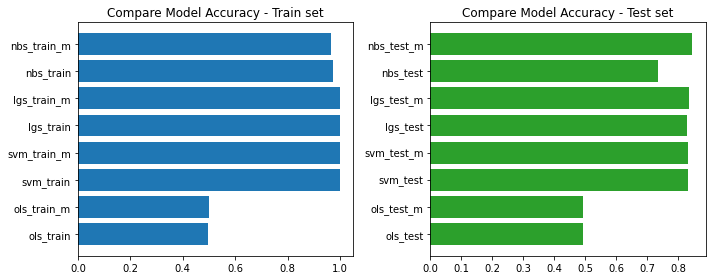

In [193]:
fits = [ols_performance_train, ols_performance_train_m, svm_performance_train, svm_performance_train_m, 
        lgs_performance_train, lgs_performance_train_m, nbs_performance_train, nbs_performance_train_m]
fits2 = [ols_performance_test, ols_performance_test_m, svm_performance_test, svm_performance_test_m, 
        lgs_performance_test, lgs_performance_test_m, nbs_performance_test, nbs_performance_test_m]

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
for fit in fits:
    plt.barh(fit.desc, fit.performance_measures['Accuracy'], color=['tab:blue'])
    plt.title('Compare Model Accuracy - Train set')

plt.subplot(1, 2, 2)
for fit in fits2:
    plt.barh(fit.desc, fit.performance_measures['Accuracy'], color=['tab:green'])
    plt.title('Compare Model Accuracy - Test set')
    
plt.tight_layout()
plt.show()

### ROC plot to compare performance of various models and fits

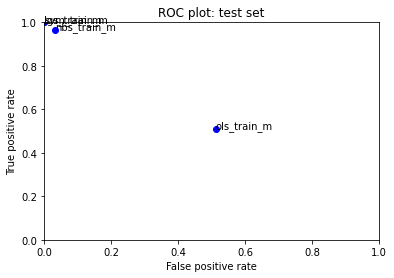

In [194]:
fits = [ols_performance_train_m, svm_performance_train_m, lgs_performance_train_m, nbs_performance_train_m]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### ROC plot to compare performance of various models and fits

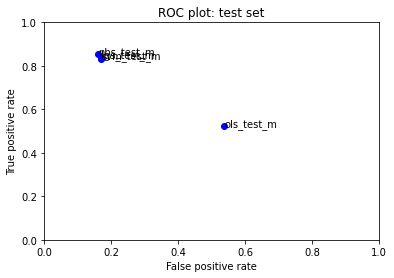

In [195]:
fits = [ols_performance_test_m, svm_performance_test_m, lgs_performance_test_m, nbs_performance_test_m]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# Summary of work and performance  

### Modifications made
The main modification made to the feature and extraction function compared to the original starter code was to decrease the number of features in the matrix ('n_features') from '2**17' to '2**16', which seemed to produce to best performance in terms of increasing accuracy especially in the test set. Increasing the n_features interesting resulted in decreasing performance in the test set, which seems to point to overfitting. 

In addition to the number of features, I also included unigrams and bigrams as features, which once again seem to produce the best results. Using only bigrams reduced the performance for all test set models. One interesting fact is taking out stopwords in the HashingVector reduced peformance in majority of models rather than vice versa. It seems that certain stopwords has deterministic characteristics in predicting the sentiment of the review. 

### Performance of the modified features model
The modified features model performance relatively well compared to the original features model especially on the test set, while there were near similar or slightly reduced performance against the train set. All models in the test set showed improvements in their accuracy rate. However, while 3 of the models - OLS, SVM, Logistical Regression - only showed minor improvement, the Naive Bayes model produced a notable 11% point differece between the original and modified features models, becoming the most accruate among the models from the least accurate one. It would be interesting to examine the reasons for such notable difference in Navie Bayes model performance based on modifications in the features going forward. 

